In [2]:
from tqdm import tqdm
import sys
import importlib
sys.path.append("/home/sambt/analytic-qg-classifiers/analysis/utils/")
from master import *
prefix = '/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/'

In [3]:
importlib.reload(analysis)
CF = 4/3
CA = 3.0
f_opt = lambda x : np.log(CF/CA)*np.count_nonzero(x,axis=1) + np.sum(np.power(x,2,where=x>0,out=np.zeros(x.shape)),axis=1)
pred = r'$\ln(\frac{C_F}{C_A})n^{(0)} + n^{(2)}$'
rocs_r4,aucs_r4,labels_r4 = analysis.run_pipeline('H2qq-CF1.3CA3.0-sq0100-esq0001-r0.4','H2gg-CF3.0CA3.0-sqg0100-r0.4',f_opt,predicted=pred)
rocs_r1,aucs_r1,labels_r1 = analysis.run_pipeline('H2qq-CF1.3CA3.0-sqg0100-esq0001-r1.0','H2gg-CF3.0CA3.0-sqg0100-r1.0',f_opt,predicted=pred,suffix='/total_1M.root')
rocs_r15,aucs_r15,labels_r15 = analysis.run_pipeline('H2qq-CF1.3CA3.0-sq0100-esq0001-r1.5','H2gg-CF3.0CA3.0-sqg0100-r1.5',f_opt,predicted=pred)

Loaded files at 0.07929039001464844
Read in arrays at 1.7017805576324463
Cleaned events at 1.784449815750122
Made quark/gluon input arrays at 1.844130039215088
Finished preprocessing at 2.497140407562256
Training PFN
PFN AUC: 0.6287958158966015
Training PFN[z]
PFN[z] AUC: 0.6281612112419254
Training PFN[eta,phi]
PFN[eta,phi] AUC: 0.6221696586293095
Training EFN
EFN AUC: 0.6219107025541142
Loaded files at 0.1320018768310547
Read in arrays at 17.39524006843567
Cleaned events at 18.16581392288208
Made quark/gluon input arrays at 18.971424341201782
Finished preprocessing at 30.267162561416626
Training PFN
PFN AUC: 0.6430913761764142
Training PFN[z]
PFN[z] AUC: 0.6410956635384907
Training PFN[eta,phi]
PFN[eta,phi] AUC: 0.6320498953468944
Training EFN
EFN AUC: 0.6233507588802294
Loaded files at 0.0544438362121582
Read in arrays at 1.665917158126831
Cleaned events at 1.7458665370941162
Made quark/gluon input arrays at 1.8381049633026123
Finished preprocessing at 3.1924474239349365
Training PF

Text(0.02, 0.35, '$P_{q \\to qg} \\propto e^{z^2}$')

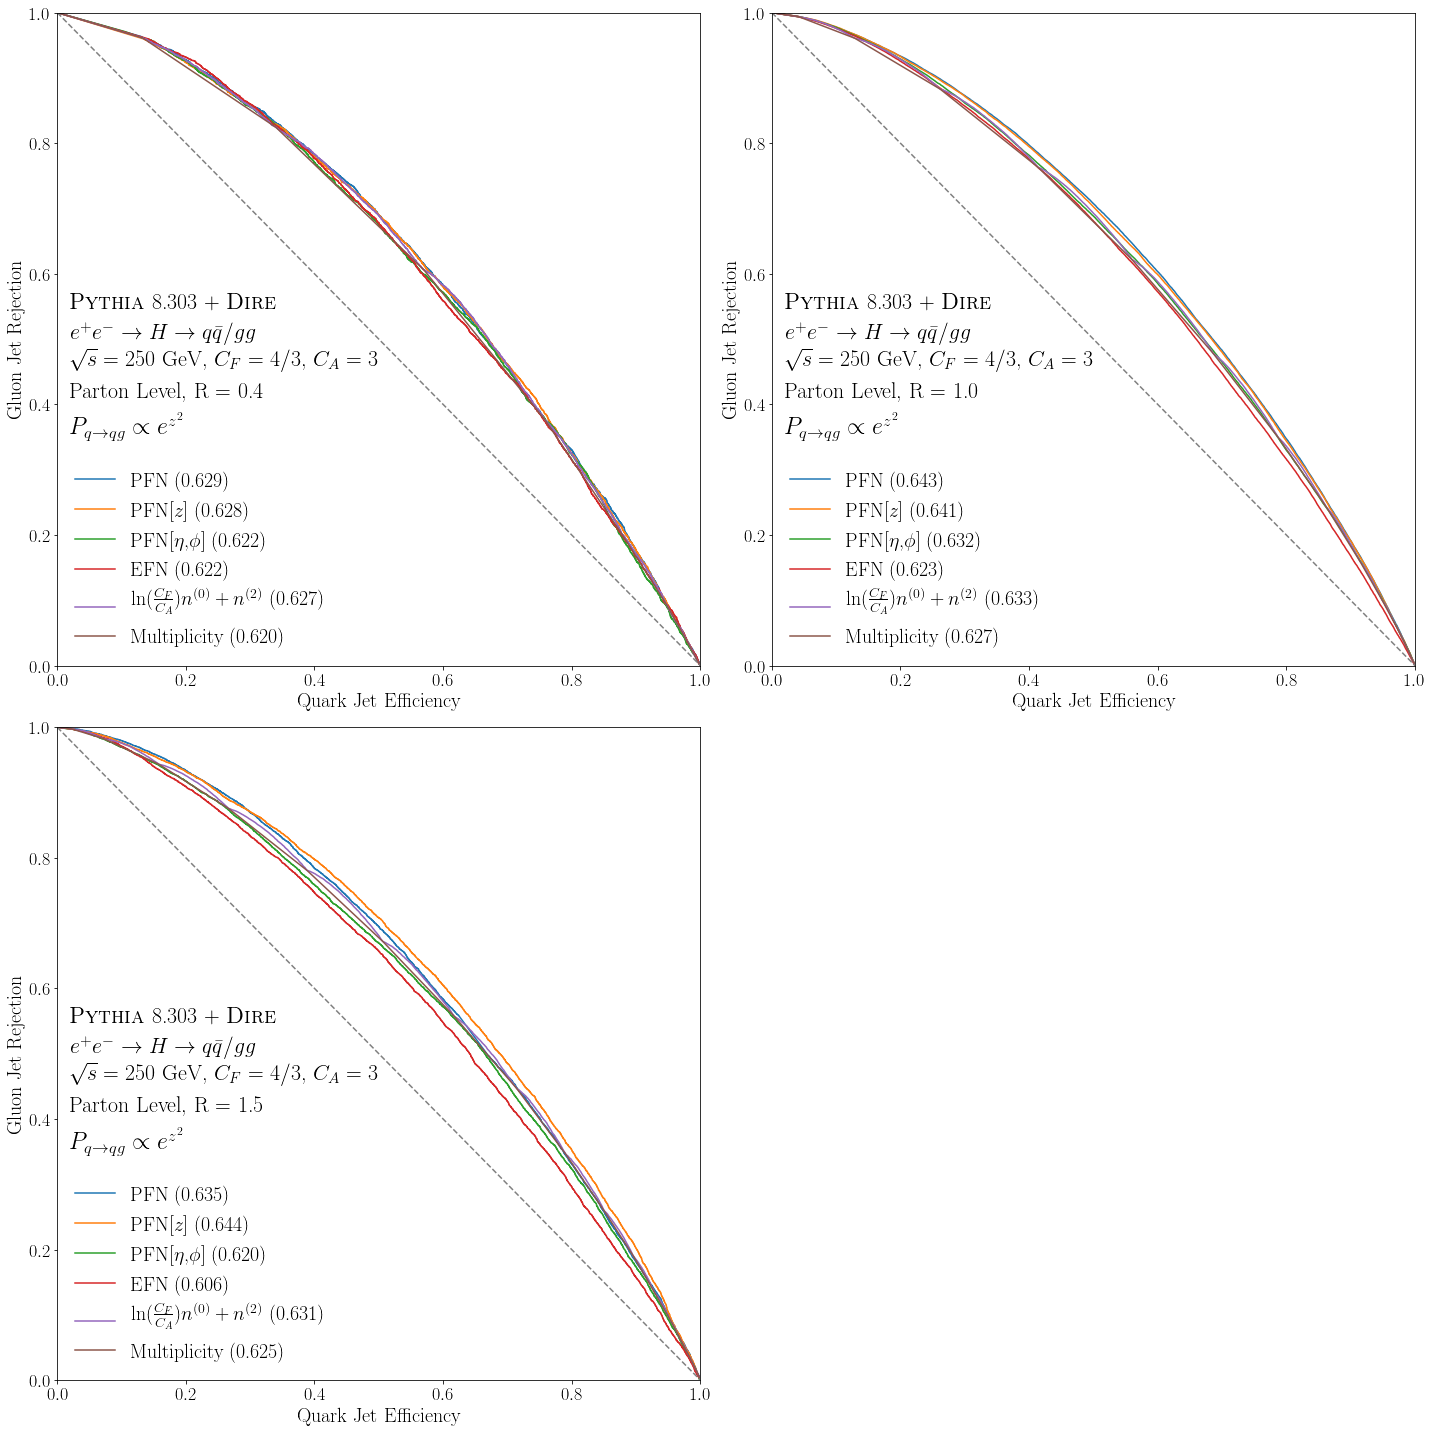

In [4]:
importlib.reload(plotting)
fig = plt.figure(figsize=(20,20))
split = r'$P_{q \to qg} \propto e^{z^2}$'
line_3 = r'$\sqrt{s} = 250$ GeV, $C_F = 4/3$, $C_A = 3$'
ax1 = plt.subplot(221)
plotting.plot_many(rocs_r4,aucs_r4,labels_r4,ax1,fontsize=20)
plotting.stamp(0.02,0.6,fontsize=22,delta_y=0.045,line_3=line_3)
plt.text(0.02,0.35,split,fontsize=24)
ax2 = plt.subplot(222)
plotting.plot_many(rocs_r1,aucs_r1,labels_r1,ax2,fontsize=20)
plotting.stamp(0.02,0.6,radius=1.0,fontsize=22,delta_y=0.045,line_3=line_3)
plt.text(0.02,0.35,split,fontsize=24)
ax3 = plt.subplot(223)
plotting.plot_many(rocs_r15,aucs_r15,labels_r15,ax3,fontsize=20)
plotting.stamp(0.02,0.6,radius=1.5,fontsize=22,delta_y=0.045,line_3=line_3)
plt.text(0.02,0.35,split,fontsize=24)

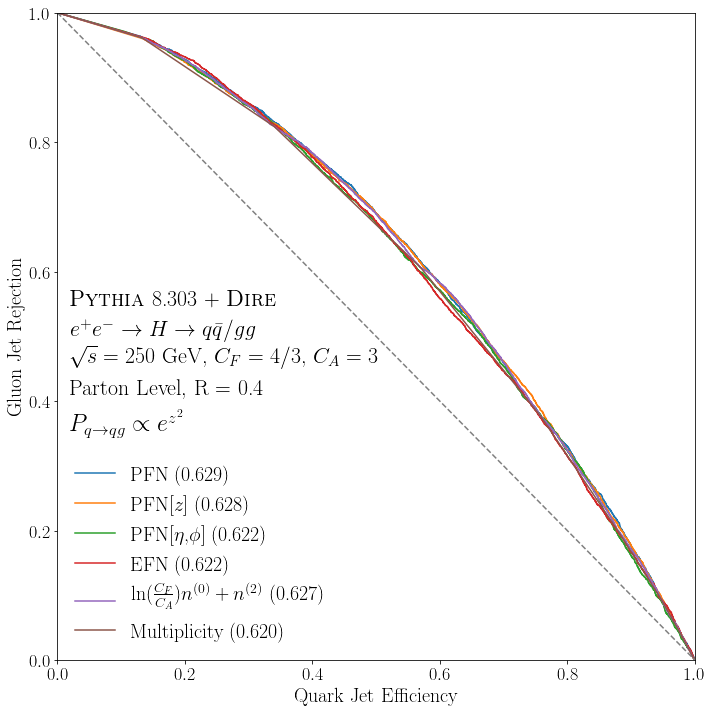

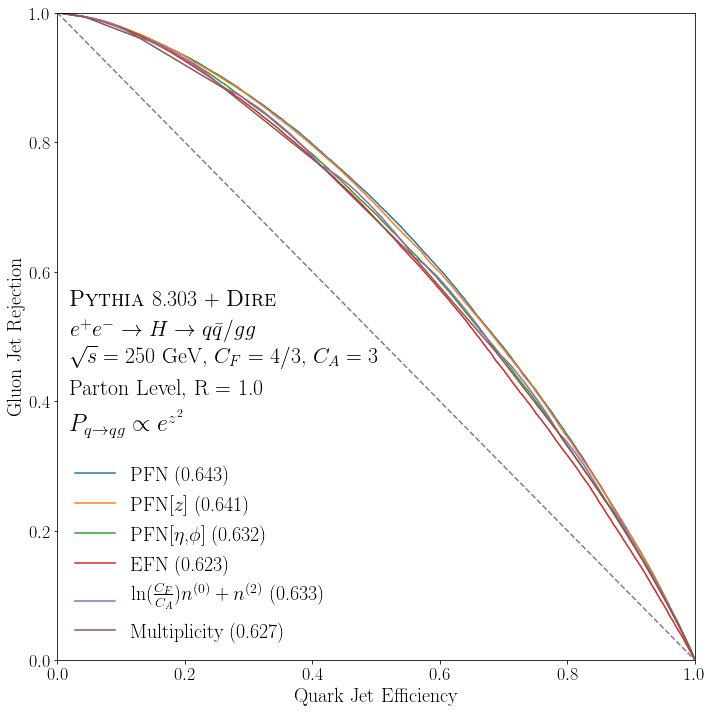

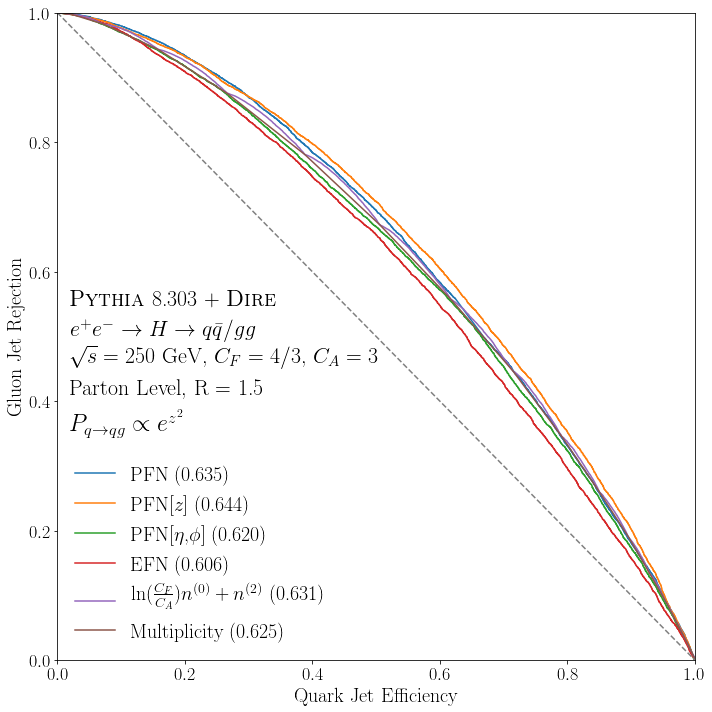

In [5]:
roc_list = [rocs_r4,rocs_r1,rocs_r15]
auc_list = [aucs_r4,aucs_r1,aucs_r15]
lab_list = [labels_r4,labels_r1,labels_r15]
rads = [0.4,1.0,1.5]
line_3 = r'$\sqrt{s} = 250$ GeV, $C_F = 4/3$, $C_A = 3$'
for i in range(len(roc_list)):
    plt.figure(figsize=(10,10))
    ax = plt.gca()
    rocs,aucs,labels = roc_list[i],auc_list[i],lab_list[i]
    plotting.plot_many(rocs,aucs,labels,ax,fontsize=20)
    plotting.stamp(0.02,0.6,fontsize=22,delta_y=0.045,line_3=line_3,radius=rads[i])
    plt.text(0.02,0.35,split,fontsize=24)
    plt.savefig('plots/ROCs_CF1.3CA3.0_sqg0100-esq0001-r'+str(rads[i])+'.pdf')

In [6]:
#Setup for scan in c0-c2 plane to determine which observables are best
def observable(c0,c2):
    return lambda x : c0*np.count_nonzero(x,axis=1) + np.sum(c2*np.power(x,2,where=x>0,out=np.zeros(x.shape)),axis=1)
c0s = np.linspace(-2,2,num=41)
c2s = np.linspace(0,2,num=21)
points = []
functions = []
for c0 in c0s:
    for c2 in c2s:
        point = "{0:.4f},{1:.4f}".format(c0,c2)
        points.append(point)
        functions.append(observable(c0,c2))

In [7]:
#Scanning in c0,c2 to see how AUC changes for optimal observable ln L = c0n(0) + c2n(2)
#H-->qq sample generated with CF = 4/3, P(q->qg) = (1/z)exp(z^2), R = 0.4
rocs_c0c2_scan_r4,aucs_c0c2_scan_r4 = analysis.run_custom_obs('H2qq-CF1.3CA3.0-sq0100-esq0001-r0.4','H2gg-CF3.0CA3.0-sqg0100-r0.4',functions)
rocs_c0c2_scan_r1,aucs_c0c2_scan_r1 = analysis.run_custom_obs('H2qq-CF1.3CA3.0-sqg0100-esq0001-r1.0','H2gg-CF3.0CA3.0-sqg0100-r1.0',functions,suffix='/total_1M.root')
rocs_c0c2_scan_r15,aucs_c0c2_scan_r15 = analysis.run_custom_obs('H2qq-CF1.3CA3.0-sq0100-esq0001-r1.5','H2gg-CF3.0CA3.0-sqg0100-r1.5',functions)
grid_r4 = np.zeros((c0s.size,c2s.size))
grid_r1 = np.zeros((c0s.size,c2s.size))
grid_r15 = np.zeros((c0s.size,c2s.size))
for i,c0 in tqdm(enumerate(c0s)):
    for j,c2 in enumerate(c2s):
        point = "{0:.4f},{1:.4f}".format(c0,c2)
        idx = points.index(point)
        grid_r4[i,j] = aucs_c0c2_scan_r4[idx]
        grid_r1[i,j] = aucs_c0c2_scan_r1[idx]
        grid_r15[i,j] = aucs_c0c2_scan_r15[idx]

Loaded files at 0.08193325996398926
Read in arrays at 2.1353468894958496
Cleaned events at 2.2253289222717285
Made quark/gluon input arrays at 2.2918856143951416
Finished preprocessing at 2.9246976375579834
Loaded files at 0.12435412406921387
Read in arrays at 17.68745470046997
Cleaned events at 18.468350887298584
Made quark/gluon input arrays at 19.258366584777832
Finished preprocessing at 30.937273502349854
Loaded files at 0.05512547492980957
Read in arrays at 1.8737730979919434
Cleaned events at 1.9540607929229736
Made quark/gluon input arrays at 2.0468380451202393
Finished preprocessing at 3.409710168838501


41it [00:00, 5269.06it/s]


In [8]:
print(grid_r4.max())
print(grid_r1.max())
print(grid_r15.max())
print("--------------")
print(grid_r4.min())
print(grid_r1.min())
print(grid_r15.min())

0.6302941545295063
0.6403443182317655
0.6418365995225999
--------------
0.5
0.5
0.5


(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]),
 <a list of 11 Text yticklabel objects>)

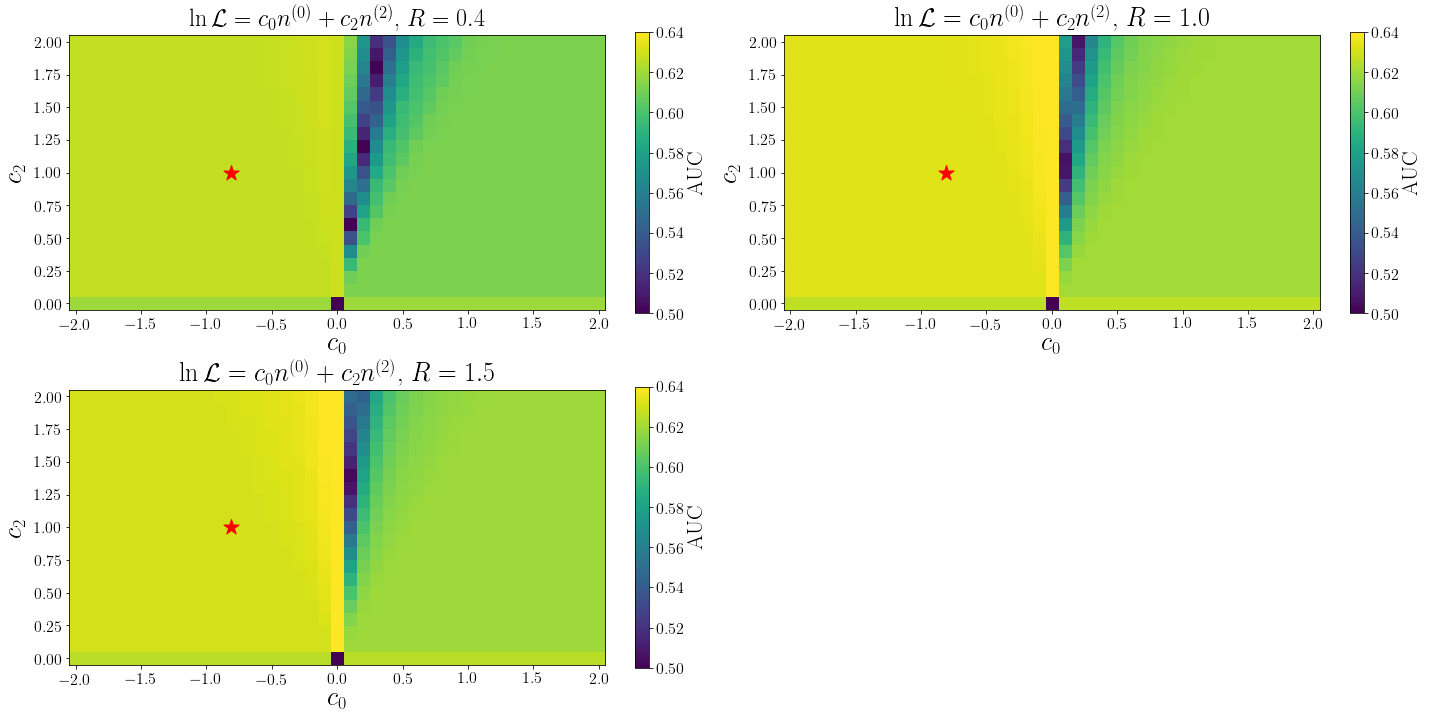

In [9]:
plt.figure(figsize=(20,10))
fsize=26
ax = plt.subplot(221)
auc_grid_r4 = plt.imshow(grid_r4.transpose(),origin='lower',extent=(-2.05,2.05,-0.05,2.05),vmin=0.5,vmax=0.640)
bar = plt.colorbar(auc_grid_r4,fraction=0.055)
bar.ax.tick_params(labelsize=16)
bar.set_label("AUC",fontsize=fsize-4)
plt.scatter(np.log(CF/CA),1,s=16**2,marker="*",c="red")
plt.title(r'$\ln\mathcal{L} = c_0n^{(0)} + c_2n^{(2)}$, $R = 0.4$',fontsize=fsize-2)
plt.xlabel(r"$c_0$",fontsize=fsize)
plt.ylabel(r"$c_2$",fontsize=fsize)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax = plt.subplot(222)
auc_grid_r1 = plt.imshow(grid_r1.transpose(),origin='lower',extent=(-2.05,2.05,-0.05,2.05),vmin=0.5,vmax=0.640)
bar = plt.colorbar(auc_grid_r1,fraction=0.055)
bar.ax.tick_params(labelsize=16)
bar.set_label("AUC",fontsize=fsize-4)
plt.scatter(np.log(CF/CA),1,s=16**2,marker="*",c="red")
plt.title(r'$\ln\mathcal{L} = c_0n^{(0)} + c_2n^{(2)}$, $R = 1.0$',fontsize=fsize)
plt.xlabel(r"$c_0$",fontsize=fsize)
plt.ylabel(r"$c_2$",fontsize=fsize)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax = plt.subplot(223)
auc_grid_r15 = plt.imshow(grid_r15.transpose(),origin='lower',extent=(-2.05,2.05,-0.05,2.05),vmin=0.5,vmax=0.640)
bar = plt.colorbar(auc_grid_r15,fraction=0.055)
bar.ax.tick_params(labelsize=16)
bar.set_label("AUC",fontsize=fsize-4)
plt.scatter(np.log(CF/CA),1,s=16**2,marker="*",c="red")
plt.title(r'$\ln\mathcal{L} = c_0n^{(0)} + c_2n^{(2)}$, $R = 1.5$',fontsize=fsize)
plt.xlabel(r"$c_0$",fontsize=fsize)
plt.ylabel(r"$c_2$",fontsize=fsize)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.savefig("plots/compare_rad_c0c2_scan_AUC_CF1.3_sqg0100-esq0001.pdf")

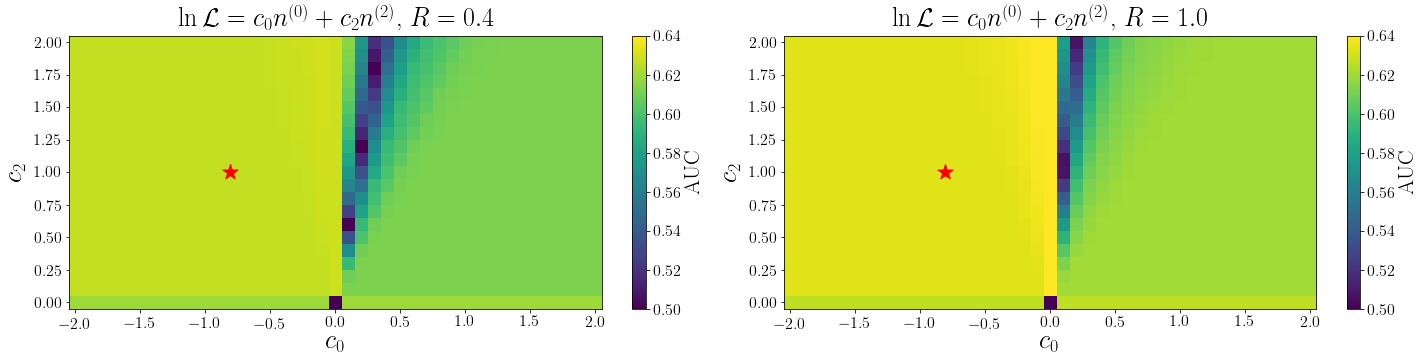

In [10]:
plt.figure(figsize=(20,5))
fsize=26
ax = plt.subplot(121)
auc_grid_r4 = plt.imshow(grid_r4.transpose(),origin='lower',extent=(-2.05,2.05,-0.05,2.05),vmin=0.5,vmax=0.640)
bar = plt.colorbar(auc_grid_r4,fraction=0.055)
bar.ax.tick_params(labelsize=16)
bar.set_label("AUC",fontsize=fsize-4)
plt.scatter(np.log(CF/CA),1,s=16**2,marker="*",c="red")
plt.title(r'$\ln\mathcal{L} = c_0n^{(0)} + c_2n^{(2)}$, $R = 0.4$',fontsize=fsize)
plt.xlabel(r"$c_0$",fontsize=fsize)
plt.ylabel(r"$c_2$",fontsize=fsize)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax = plt.subplot(122)
auc_grid_r1 = plt.imshow(grid_r1.transpose(),origin='lower',extent=(-2.05,2.05,-0.05,2.05),vmin=0.5,vmax=0.640)
bar = plt.colorbar(auc_grid_r1,fraction=0.055)
bar.ax.tick_params(labelsize=16)
bar.set_label("AUC",fontsize=fsize-4)
plt.scatter(np.log(CF/CA),1,s=16**2,marker="*",c="red")
plt.title(r'$\ln\mathcal{L} = c_0n^{(0)} + c_2n^{(2)}$, $R = 1.0$',fontsize=fsize)
plt.xlabel(r"$c_0$",fontsize=fsize)
plt.ylabel(r"$c_2$",fontsize=fsize)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig("plots/compare_r4r1_c0c2scan_AUC_CF1.3CA3.0_sqg0100-esq0001_horiz.pdf")

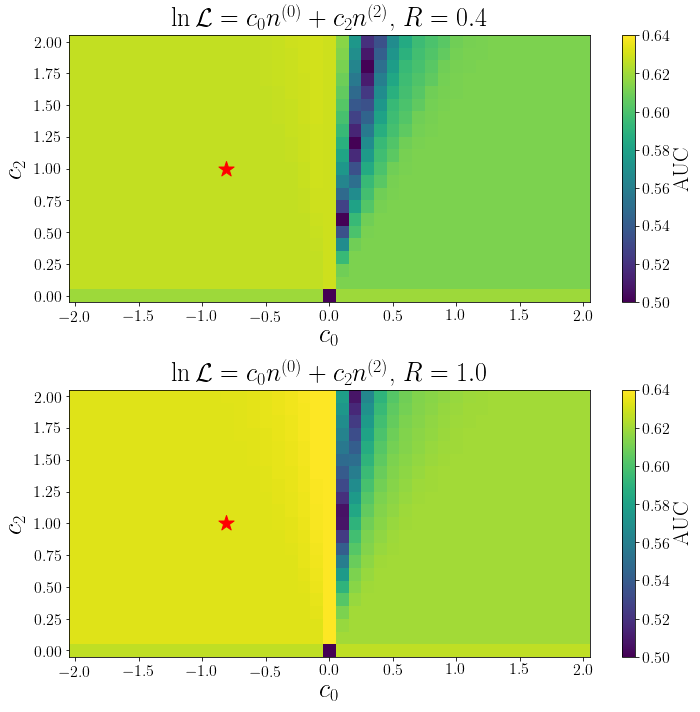

In [11]:
plt.figure(figsize=(10,10))
fsize=26
ax = plt.subplot(211)
auc_grid_r4 = plt.imshow(grid_r4.transpose(),origin='lower',extent=(-2.05,2.05,-0.05,2.05),vmin=0.5,vmax=0.640)
bar = plt.colorbar(auc_grid_r4,fraction=0.055)
bar.ax.tick_params(labelsize=16)
bar.set_label("AUC",fontsize=fsize-4)
plt.scatter(np.log(CF/CA),1,s=16**2,marker="*",c="red")
plt.title(r'$\ln\mathcal{L} = c_0n^{(0)} + c_2n^{(2)}$, $R = 0.4$',fontsize=fsize)
plt.xlabel(r"$c_0$",fontsize=fsize)
plt.ylabel(r"$c_2$",fontsize=fsize)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax = plt.subplot(212)
auc_grid_r1 = plt.imshow(grid_r1.transpose(),origin='lower',extent=(-2.05,2.05,-0.05,2.05),vmin=0.5,vmax=0.640)
bar = plt.colorbar(auc_grid_r1,fraction=0.055)
bar.ax.tick_params(labelsize=16)
bar.set_label("AUC",fontsize=fsize-4)
plt.scatter(np.log(CF/CA),1,s=16**2,marker="*",c="red")
plt.title(r'$\ln\mathcal{L} = c_0n^{(0)} + c_2n^{(2)}$, $R = 1.0$',fontsize=fsize)
plt.xlabel(r"$c_0$",fontsize=fsize)
plt.ylabel(r"$c_2$",fontsize=fsize)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig("plots/compare_r4r1_c0c2scan_AUC_CF1.3CA3.0_sqg0100-esq0001_vert.pdf")

In [12]:
c0_0_val = 0
c2_0_val = 0
print("Benchmarks at R = 0.4")
for i,pt in enumerate(points):
    c0c2 = pt.split(",")
    auc = aucs_c0c2_scan_r4[i]
    c0, c2 = float(c0c2[0]),float(c0c2[1])
    if c0 == 0 and auc != c0_0_val and auc > 0.5:
        print("c0 = 0, c2 = {0}, AUC = {1}".format(c2,auc))
        c0_0_val = auc
    if c2 == 0 and auc != c2_0_val and auc > 0.5:
        print("c0 = {0}, c2 = 0, AUC = {1}".format(c0,auc))
        c2_0_val = auc
    if (c0 == -0.9 or c0 == -0.8) and c2 == 1:
        print("With the default coefficients AUC = {0}".format(auc))
    if c0 == 1.5 and c2 == 1:
        print("At c_0 = 1.5, c_2 = 1, AUC = {0}".format(auc))
    if c0 == -1.5 and c2 == 1:
        print("At c_0 = -1.5, c_2 = 1, AUC = {0}".format(auc))
print("----------------------")
c0_0_val = 0
c2_0_val = 0
print("Benchmarks at R = 1")
for i,pt in enumerate(points):
    c0c2 = pt.split(",")
    auc = aucs_c0c2_scan_r1[i]
    c0, c2 = float(c0c2[0]),float(c0c2[1])
    if c0 == 0 and auc != c0_0_val and auc > 0.5:
        print("c0 = 0, c2 = {0}, AUC = {1}".format(c2,auc))
        c0_0_val = auc
    if c2 == 0 and auc != c2_0_val and auc > 0.5:
        print("c0 = {0}, c2 = 0, AUC = {1}".format(c0,auc))
        c2_0_val = auc
    if (c0 == -0.9 or c0 == -0.8) and c2 == 1:
        print("With the default coefficients AUC = {0}".format(auc))
    if c0 == 1.5 and c2 == 1:
        print("At c_0 = 1.5, c_2 = 1, AUC = {0}".format(auc))
    if c0 == -1.5 and c2 == 1:
        print("At c_0 = -1.5, c_2 = 1, AUC = {0}".format(auc))
print("----------------------")
c0_0_val = 0
c2_0_val = 0
print("Benchmarks at R = 1.5")
for i,pt in enumerate(points):
    c0c2 = pt.split(",")
    auc = aucs_c0c2_scan_r15[i]
    c0, c2 = float(c0c2[0]),float(c0c2[1])
    if c0 == 0 and auc != c0_0_val and auc > 0.5:
        print("c0 = 0, c2 = {0}, AUC = {1}".format(c2,auc))
        c0_0_val = auc
    if c2 == 0 and auc != c2_0_val and auc > 0.5:
        print("c0 = {0}, c2 = 0, AUC = {1}".format(c0,auc))
        c2_0_val = auc
    if (c0 == -0.9 or c0 == -0.8) and c2 == 1:
        print("With the default coefficients AUC = {0}".format(auc))
    if c0 == 1.5 and c2 == 1:
        print("At c_0 = 1.5, c_2 = 1, AUC = {0}".format(auc))
    if c0 == -1.5 and c2 == 1:
        print("At c_0 = -1.5, c_2 = 1, AUC = {0}".format(auc))
print("----------------------")

Benchmarks at R = 0.4
c0 = -2.0, c2 = 0, AUC = 0.619533428332214
At c_0 = -1.5, c_2 = 1, AUC = 0.6268900342707565
With the default coefficients AUC = 0.6268900342707565
With the default coefficients AUC = 0.6268900342707565
c0 = 0, c2 = 0.1, AUC = 0.6292974291789537
At c_0 = 1.5, c_2 = 1, AUC = 0.6121768223936717
----------------------
Benchmarks at R = 1
c0 = -2.0, c2 = 0, AUC = 0.6267427490339409
At c_0 = -1.5, c_2 = 1, AUC = 0.6330421235925544
With the default coefficients AUC = 0.6330421235925544
With the default coefficients AUC = 0.6330421235925544
c0 = 0, c2 = 0.1, AUC = 0.6399594078936509
At c_0 = 1.5, c_2 = 1, AUC = 0.6204433744753273
----------------------
Benchmarks at R = 1.5
c0 = -2.0, c2 = 0, AUC = 0.6253517559585148
At c_0 = -1.5, c_2 = 1, AUC = 0.6309848473191854
With the default coefficients AUC = 0.6309848473191854
With the default coefficients AUC = 0.6309848473191854
c0 = 0, c2 = 0.1, AUC = 0.6418365995225999
At c_0 = 1.5, c_2 = 1, AUC = 0.6197186645978441
---------

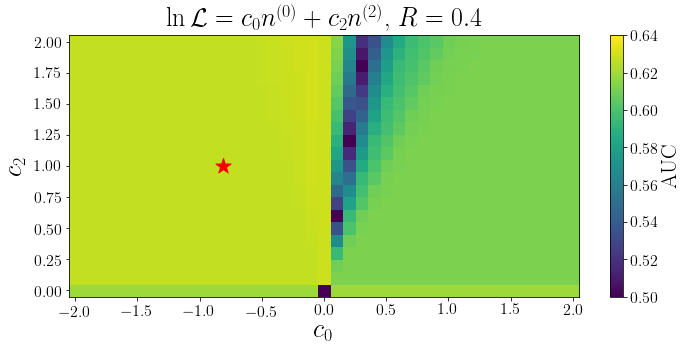

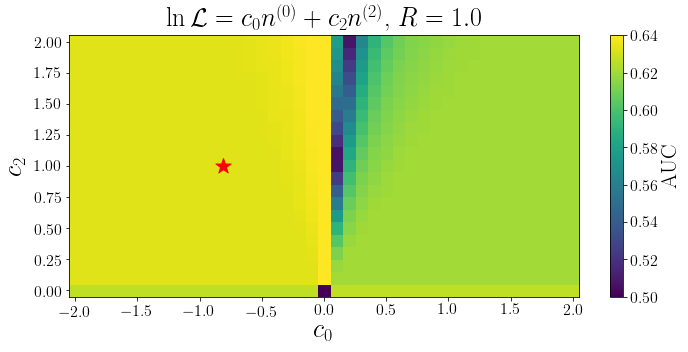

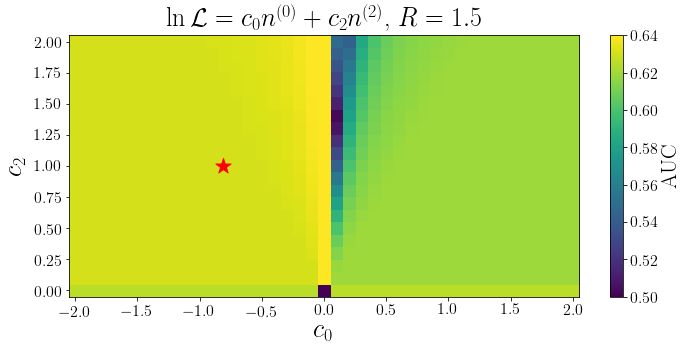

In [13]:
grids = [grid_r4,grid_r1,grid_r15]
rads = [0.4,1.0,1.5]
fsize = 26
for i,grid in enumerate(grids):
    plt.figure(figsize=(10,5))
    auc_grid = plt.imshow(grid.transpose(),origin='lower',extent=(-2.05,2.05,-0.05,2.05),vmin=0.5,vmax=0.640)
    bar = plt.colorbar(auc_grid,fraction=0.055)
    bar.ax.tick_params(labelsize=16)
    bar.set_label("AUC",fontsize=fsize-4)
    plt.scatter(np.log(CF/CA),1,s=16**2,marker="*",c="red")
    plt.title(r'$\ln\mathcal{L} = c_0n^{(0)} + c_2n^{(2)}$, $R ='+str(rads[i])+'$',fontsize=fsize)
    plt.xlabel(r"$c_0$",fontsize=fsize)
    plt.ylabel(r"$c_2$",fontsize=fsize)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.savefig('plots/c0c2_AUC_grid_sqg0100-esq0001-r'+str(rads[i])+'.pdf')